In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np


In [2]:
txt_file = open("training_data.txt", "r")
file_content = txt_file.read()
training_data = file_content.split(" ")
txt_file.close()
training_data=training_data[0:640000]

txt_file = open("test_data.txt", "r")
file_content = txt_file.read()
test_data = file_content.split(" ")
txt_file.close()
test_data=test_data[0:640000]


In [3]:
def bag(my_list,freq):
   
   
    for item in my_list:
            freq[item] = 0
           
    
vocab_dict={}
bag(training_data+test_data,vocab_dict)



In [4]:

def CountFrequency(my_list):
    freq=copy.copy(vocab_dict)  
    for item in my_list:
        if (item in freq):
            freq[item] +=1


    return freq        

def perplexity_mle(n,freq,data):
     sum=0
     for i in range(len(data)):
         p=freq[data[i]]/len(data)
         if(p==0):
            sum=sum-float('inf')
         else:
            sum=sum+math.log(p)
     sum=sum/(-n)
     return math.exp(sum)    

def perplexity_map(n,freq,data,alpha0,alphak,k,l):
     sum=0
     for i in range(len(data)):
         p=(freq[data[i]]+alphak-1)/(l+alpha0-k)
         if(p==0):
              return "a"
         sum=sum+math.log(p)
     sum=sum/(-n)
     return math.exp(sum) 


def perplexity_pred_dist(n,freq,data,alpha0,alphak,l):
     sum=0
     for i in range(len(data)):
         p=(freq[data[i]]+alphak)/(l+alpha0)
         sum=sum+math.log(p)
     sum=sum/(-n)
     return math.exp(sum) 



In [5]:
training_data1=training_data[0:5000] #n/128=5000
training_data2=training_data[0:10000] #n/64=10000
training_data3=training_data[0:40000] #n/16=40000
training_data4=training_data[0:160000] #n/4=160000
training_data5=training_data #n=640000


#count of words in each training data
freq_1=CountFrequency(training_data1) #in training_data1
freq_2=CountFrequency(training_data2)#in training_data2
freq_3=CountFrequency(training_data3)#in training_data3
freq_4=CountFrequency(training_data4)#in training_data4
freq_5=CountFrequency(training_data5)#in training_data5


In [7]:
# When training set is of 5000 element
#MLE
print("*MLE*")
perplexity_mle_ans_5k_tr=perplexity_mle(640000,freq_1,training_data)
print("Perplexity using the maximum likelihood estimate for Train :",(perplexity_mle_ans_5k_tr))

perplexity_mle_ans_5k=perplexity_mle(640000,freq_1,test_data)
print("Perplexity using the maximum likelihood estimate for Test :",(perplexity_mle_ans_5k))
#MAP
print("*MAP*")
perplexity_map_ans_5k_tr=perplexity_map(640000,freq_1,training_data,20000,2,10000,5000)
print("Perplexity using the MAP estimate for Train",perplexity_map_ans_5k_tr)

perplexity_map_ans_5k=perplexity_map(640000,freq_1,test_data,20000,2,10000,5000)
print("Perplexity using the MAP estimate for Test",perplexity_map_ans_5k)
 # **Predective dist**
print("*Pred dist*")
perplexity_pred_dist_ans_5k_tr=perplexity_pred_dist(640000,freq_1,training_data,20000,2,5000)
print("Perplexity using the predictive distribution for Train",perplexity_pred_dist_ans_5k_tr)

perplexity_pred_dist_ans_5k=perplexity_pred_dist(640000,freq_1,test_data,20000,2,5000)
print("Perplexity using the predictive distribution for Test",perplexity_pred_dist_ans_5k)

*MLE*
Perplexity using the maximum likelihood estimate for Train : inf
Perplexity using the maximum likelihood estimate for Test : inf
*MAP*
Perplexity using the MAP estimate for Train 10047.88041220642
Perplexity using the MAP estimate for Test 10098.36492411617
*Pred dist*
Perplexity using the predictive distribution for Train 9782.98313217559
Perplexity using the predictive distribution for Test 9814.024919445475


In [8]:
# When training set is of 10000 element
#Mle
print("*MLe*")
perplexity_mle_ans_10k_tr=perplexity_mle(640000,freq_2,training_data)
print("Perplexity using the maximum likelihood estimate for train :",(perplexity_mle_ans_10k_tr))


perplexity_mle_ans_10k=perplexity_mle(640000,freq_2,test_data)
print("Perplexity using the maximum likelihood estimate for test :",(perplexity_mle_ans_10k))
#MAP
print("*MAP")
perplexity_map_ans_10k_tr=perplexity_map(640000,freq_2,training_data,20000,2,10000,10000)
print("Perplexity using the MAP estimate for train",perplexity_map_ans_10k_tr)


perplexity_map_ans_10k=perplexity_map(640000,freq_2,test_data,20000,2,10000,10000)
print("Perplexity using the MAP estimate for test",perplexity_map_ans_10k)
#pred dis
print("*pred dis*")
perplexity_pred_dist_ans_10k_tr=perplexity_pred_dist(640000,freq_2,training_data,20000,2,10000)
print("Perplexity using the predictive distribution for train",perplexity_pred_dist_ans_10k_tr)

perplexity_pred_dist_ans_10k=perplexity_pred_dist(640000,freq_2,test_data,20000,2,10000)
print("Perplexity using the predictive distribution for test",perplexity_pred_dist_ans_10k)

*MLe*
Perplexity using the maximum likelihood estimate for train : inf
Perplexity using the maximum likelihood estimate for test : inf
*MAP
Perplexity using the MAP estimate for train 9917.43567943996
Perplexity using the MAP estimate for test 9992.362371992125
*pred dis*
Perplexity using the predictive distribution for train 9619.499986112396
Perplexity using the predictive distribution for test 9668.062580182157


In [9]:
# When training set is of 40000 element
#mle
print("*MLE*")
perplexity_mle_ans_40k_tr=perplexity_mle(640000,freq_3,training_data)
print("Perplexity using the maximum likelihood estimate for train:",(perplexity_mle_ans_40k_tr))


perplexity_mle_ans_40k=perplexity_mle(640000,freq_3,test_data)
print("Perplexity using the maximum likelihood estimate for test:",(perplexity_mle_ans_40k))
#map
print("*MAP*")
perplexity_map_ans_40k_tr=perplexity_map(640000,freq_3,training_data,20000,2,10000,40000)
print("Perplexity using the MAP estimate for train",perplexity_map_ans_40k_tr)


perplexity_map_ans_40k=perplexity_map(640000,freq_3,test_data,20000,2,10000,40000)
print("Perplexity using the MAP estimate for test",perplexity_map_ans_40k)
#pred dis
print("*Pred Dist*")
perplexity_pred_dist_ans_40k_tr=perplexity_pred_dist(640000,freq_3,training_data,20000,2,40000)
print("Perplexity using the predictive distribution for train",perplexity_pred_dist_ans_40k_tr)

perplexity_pred_dist_ans_40k=perplexity_pred_dist(640000,freq_3,test_data,20000,2,40000)
print("Perplexity using the predictive distribution for test",perplexity_pred_dist_ans_40k)

*MLE*
Perplexity using the maximum likelihood estimate for train: inf
Perplexity using the maximum likelihood estimate for test: inf
*MAP*
Perplexity using the MAP estimate for train 9255.182346253425
Perplexity using the MAP estimate for test 9380.752312326787
*Pred Dist*
Perplexity using the predictive distribution for train 9127.235965446844
Perplexity using the predictive distribution for test 9224.511912933269


In [10]:
# When training set is of 160000 element
#MLE
print("*MLE*")
perplexity_mle_ans_160k_tr=perplexity_mle(640000,freq_4,training_data)
print("Perplexity using the maximum likelihood estimate for train :",perplexity_mle_ans_160k_tr)


perplexity_mle_ans_160k=perplexity_mle(640000,freq_4,test_data)
print("Perplexity using the maximum likelihood estimate for test:",perplexity_mle_ans_160k)
#MAP
print("*MAP*")
perplexity_map_ans_160k_tr=perplexity_map(640000,freq_4,training_data,20000,2,10000,160000)
print("Perplexity using the MAP estimate for train",perplexity_map_ans_160k_tr)


perplexity_map_ans_160k=perplexity_map(640000,freq_4,test_data,20000,2,10000,160000)
print("Perplexity using the MAP estimate for test",perplexity_map_ans_160k)
#pred dis
print("*Pred Dis*")
perplexity_pred_dist_ans_160k_tr=perplexity_pred_dist(640000,freq_4,training_data,20000,2,160000)
print("Perplexity using the predictive distribution for train",perplexity_pred_dist_ans_160k_tr)

perplexity_pred_dist_ans_160k=perplexity_pred_dist(640000,freq_4,test_data,20000,2,160000)
print("Perplexity using the predictive distribution for test",perplexity_pred_dist_ans_160k)

*MLE*
Perplexity using the maximum likelihood estimate for train : inf
Perplexity using the maximum likelihood estimate for test: inf
*MAP*
Perplexity using the MAP estimate for train 8693.509011629605
Perplexity using the MAP estimate for test 8839.546029448937
*Pred Dis*
Perplexity using the predictive distribution for train 8683.653146964924
Perplexity using the predictive distribution for test 8817.904839672385


In [11]:
# When training set is of 640000 element
#MLE
print("*MLE*")
perplexity_mle_ans_640k_tr=perplexity_mle(640000,freq_5,training_data)
print("Perplexity using the maximum likelihood estimate for train:",perplexity_mle_ans_640k_tr)


perplexity_mle_ans_640k=perplexity_mle(640000,freq_5,test_data)
print("Perplexity using the maximum likelihood estimate for test:",perplexity_mle_ans_640k)
#MAP
print("*MAP*")
perplexity_map_ans_640k_tr=perplexity_map(640000,freq_5,training_data,20000,2,10000,640000)
print("Perplexity using the MAP estimate for train",perplexity_map_ans_640k_tr)


perplexity_map_ans_640k=perplexity_map(640000,freq_5,test_data,20000,2,10000,640000)
print("Perplexity using the MAP estimate for test",perplexity_map_ans_640k)
#pred dist
print("*Pred dist*")
perplexity_pred_dist_ans_640k_tr=perplexity_pred_dist(640000,freq_5,training_data,20000,2,640000)
print("Perplexity using the predictive distribution for train",perplexity_pred_dist_ans_640k_tr)

perplexity_pred_dist_ans_640k=perplexity_pred_dist(640000,freq_5,test_data,20000,2,640000)
print("Perplexity using the predictive distribution for test",perplexity_pred_dist_ans_640k)

*MLE*
Perplexity using the maximum likelihood estimate for train: 8506.43367662384
Perplexity using the maximum likelihood estimate for test: 8657.623041731129
*MAP*
Perplexity using the MAP estimate for train 8506.96513236839
Perplexity using the MAP estimate for test 8654.590090965366
*Pred dist*
Perplexity using the predictive distribution for train 8508.427803625034
Perplexity using the predictive distribution for test 8652.803792634657


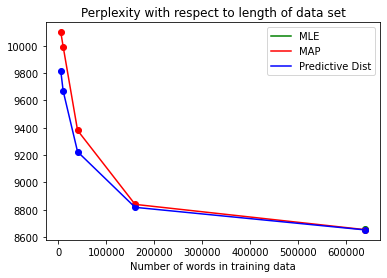

In [12]:
x = np.array([5000,10000,40000,160000,640000])
y1 = np.array([perplexity_mle_ans_5k,perplexity_mle_ans_10k,perplexity_mle_ans_40k,perplexity_mle_ans_160k,perplexity_mle_ans_640k])
y2 = np.array([perplexity_map_ans_5k,perplexity_map_ans_10k,perplexity_map_ans_40k,perplexity_map_ans_160k,perplexity_map_ans_640k])
y3 = np.array([perplexity_pred_dist_ans_5k,perplexity_pred_dist_ans_10k,perplexity_pred_dist_ans_40k,perplexity_pred_dist_ans_160k,perplexity_pred_dist_ans_640k])


plt.scatter(x, y1, color='green')
plt.scatter(x, y2, color='red')
plt.scatter(x, y3, color='blue')

# Scatter Plot color array
plt.title("Perplexity with respect to length of data set")

plt.xlabel("Number of words in training data")

# Display
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')

plt.legend(['MLE', 'MAP','Predictive Dist'])
plt.show()




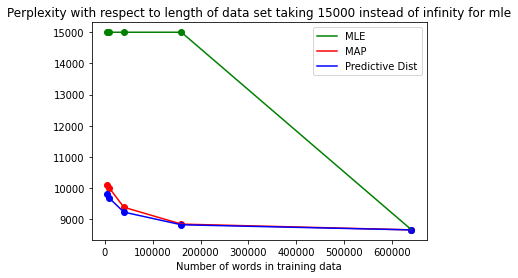

In [13]:
x = np.array([5000,10000,40000,160000,640000])
y1 = np.array([15000,15000,15000,15000,perplexity_mle_ans_640k])
y2 = np.array([perplexity_map_ans_5k,perplexity_map_ans_10k,perplexity_map_ans_40k,perplexity_map_ans_160k,perplexity_map_ans_640k])
y3 = np.array([perplexity_pred_dist_ans_5k,perplexity_pred_dist_ans_10k,perplexity_pred_dist_ans_40k,perplexity_pred_dist_ans_160k,perplexity_pred_dist_ans_640k])


plt.scatter(x, y1, color='green')
plt.scatter(x, y2, color='red')
plt.scatter(x, y3, color='blue')

# Scatter Plot color array
plt.title("Perplexity with respect to length of data set taking 15000 instead of infinity for mle")

plt.xlabel("Number of words in training data")

# Display
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')

plt.legend(['MLE', 'MAP','Predictive Dist'])
plt.show()




In [ ]:
#Task 2
#With use of training_data1 ,freq_1 

In [14]:
alpha=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]


In [15]:
def per_all_alpha(n,freq,data,alpha,ans_list_per,l):
                   
    for j in alpha: 
     sum=0
     for i in range(len(data)):
         p=(freq[data[i]]+j)/(l+ (j*10000))
         sum=sum+math.log(p)
     sum=math.exp(sum/(-n))
     ans_list_per.append(sum)
    
     

    


def evidence(freq,data,alpha,evidence_ans):
  
  for j in alpha:
      sum=0
      for i in freq:
        sum=sum+ (math.log(math.factorial(j+freq[i]-1)))  -math.log(math.factorial(j-1))
        ##print(sum) 
      #print(sum)  
      sum=sum+(math.log(math.factorial( ( 10000*j ) -1 )) - math.log ( math.factorial ( 10000*j+5000-1   )))
      #print(sum)
      evidence_ans.append(sum)
      
       


In [16]:
ans_list_per=[]
per_all_alpha(640000,freq_1,test_data,alpha,ans_list_per,5000)
print("list of perplexity values for each α :\n",ans_list_per)

evidence_ans=[]
evidence(freq_1,test_data,alpha,evidence_ans)
print("list of evidence values for each α :\n", evidence_ans)

list of perplexity values for each α :
 [10098.36492411617, 9814.024919445475, 9786.08170018863, 9795.817303703838, 9812.080606261894, 9828.21403004244, 9842.709323329726, 9855.37841243399, 9866.383690155306, 9875.959835677339]
list of evidence values for each α :
 [-46113.90994393522, -46016.42218337306, -46004.65053748851, -46005.4713075168, -46008.750364784675, -46012.29823477565, -46015.57636918427, -46018.47568448576, -46021.00839884648, -46023.21824468622]


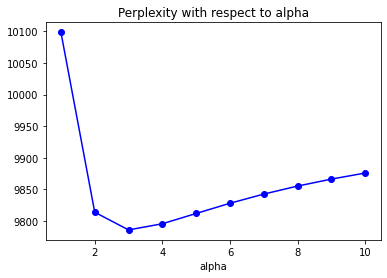

In [17]:
x = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
y1=ans_list_per
y2=evidence_ans

#plt.scatter(x, y1, color='green')
plt.scatter(x, y1, color='blue')

# Scatter Plot color array
plt.title("Perplexity with respect to alpha")

plt.xlabel("alpha")

# Display
plt.plot(x,y1,color='blue')

plt.show()



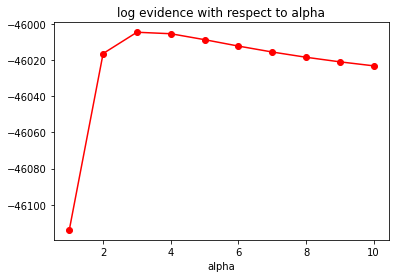

In [19]:
x = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
y1=ans_list_per
y2=evidence_ans

plt.scatter(x, y2, color='red')

# Scatter Plot color array
plt.title("log evidence with respect to alpha")

plt.xlabel("alpha")

# Display
plt.plot(x,y2,color='red')

plt.show()



In [20]:
#Task 3
import re
import copy
import math


In [21]:
txt_file = open("pg121.txt.clean", "r")
file_content = txt_file.read()
data_training = re.split(r'\W+', file_content)
data_training.remove("")
#data_training.remove('\n')
txt_file.close()
#training_data=training_data[0:640000]

txt_file = open("pg1400.txt.clean", "r")
file_content = txt_file.read()
data_test1 = re.split(r'\W+', file_content)
data_test1.remove("")
#data_test1.remove('\n')
txt_file.close()

txt_file = open("pg141.txt.clean", "r")
file_content = txt_file.read()
data_test2 = re.split(r'\W+', file_content)
data_test2.remove("")
#data_test2.remove('\n')
txt_file.close()



In [22]:
def bag(my_list,freq):
   
   
    for item in my_list:
            freq[item] = 0
           
    
vocab={}
bag(data_training+data_test1 +data_test2,vocab)
#del vocab['']

In [24]:
def CountFrequency_t3(my_list):
    freq=copy.copy(vocab)  
    for item in my_list:
        if (item in freq):
            freq[item] +=1


    return freq        


In [25]:
def perplexity_pred_dist_t3(freq,data,alpha0,alphak):
     sum=0
     for i in range(len(data)):
         p=(freq[data[i]]+alphak)/(len(data_training)+alpha0)
         sum=sum+math.log(p)
     sum=sum/(-(len(data)))
     return math.exp(sum) 



In [26]:

freq=CountFrequency_t3(data_training)


In [27]:
task_3_1=perplexity_pred_dist_t3(freq,data_test1,(18251*2),2)
print("Perplexity using the predictive distribution",task_3_1)

Perplexity using the predictive distribution 6397.359553488723


In [28]:
task_3_2=perplexity_pred_dist_t3(freq,data_test2,(18251*2),2)
print("Perplexity using the predictive distribution",task_3_2)

Perplexity using the predictive distribution 4784.562471838497
